In [2]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/imports.ipynb")

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [3]:
#classI = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.class_i.csv',
#                     index_col=0)
classI = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/patient_affinities.cancer.PHBR.csv',
                     index_col=0)

classII = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.class_ii.csv',
                     index_col=0)

In [4]:
patient_mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_mutations.csv',
                     index_col=0)

In [5]:
print classI.shape, classII.shape, patient_mutations.shape

(9176, 1018) (7085, 1018) (7085, 1018)


In [6]:
tmp1 = pd.DataFrame(sum(classI < 2, axis=1) / 1018)
tmp1.columns = ['classI']
tmp2 = pd.DataFrame(sum(classII < 12, axis=1) / 1018)
tmp2.columns = ['classII']
df = pd.merge(tmp1, tmp2, left_index=True, right_index=True)

In [7]:
df.head()

,classI,classII
TCGA-DH-A7UV,0.494106,0.367387
TCGA-DH-A7UT,0.554028,0.371316
TCGA-DH-A7UU,0.436149,0.350688
TCGA-DH-A7UR,0.501965,0.361493
TCGA-DH-A7US,0.441061,0.400786


In [8]:
LI, HI = df.classI.quantile(0.2), df.classI.quantile(0.8)
LII, HII = df.classII.quantile(0.2), df.classII.quantile(0.8)

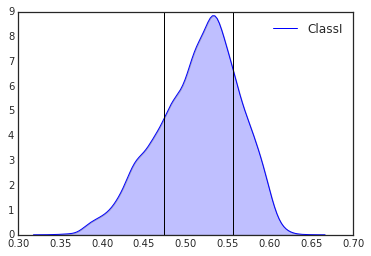

In [9]:
sns.kdeplot(df.classI, shade=True, label='ClassI')
plt.axvline(LI, c='k')
plt.axvline(HI, c='k')

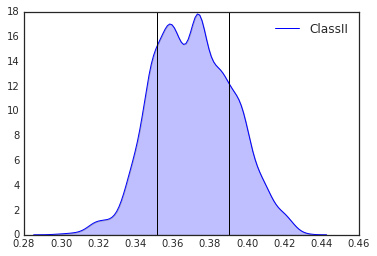

In [10]:
sns.kdeplot(df.classII, shade=True, label='ClassII')
plt.axvline(LII, c='k')
plt.axvline(HII, c='k')

#### Add other variables

Tissue

In [11]:
patient_tissues = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/clinical/tissue_type/patient_tissues.csv', index_col=0)
patient_tissues.index = patient_tissues.Sample
df['Tissue'] = patient_tissues.ix[df.index].Tissue 

Age

In [12]:
age = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/clinical/age_at_diagnosis.csv', index_col=0)
df['Age'] = age.ix[df.index].age

Driver count

In [13]:
driver_sum = pd.DataFrame(patient_mutations.sum(axis=1))
driver_sum.columns = ['driver_sum']
df['Driver_sum'] = driver_sum.ix[df.index].driver_sum 

Ancestory

In [24]:
ancestry = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/clinical/ancestory.csv', index_col=0)
df = pd.merge(df, ancestry, left_index=True, right_index=True)

### Associations

Tissue

In [15]:
df.head()

,classI,classII,Tissue,Age,Driver_sum
TCGA-DH-A7UV,0.494106,0.367387,LGG,49.0,2
TCGA-DH-A7UT,0.554028,0.371316,LGG,30.0,2
TCGA-DH-A7UU,0.436149,0.350688,LGG,43.0,2
TCGA-DH-A7UR,0.501965,0.361493,LGG,59.0,0
TCGA-DH-A7US,0.441061,0.400786,LGG,50.0,2


In [16]:
for tissue in df.Tissue.unique():
    if len(df[df.Tissue == tissue]) > 100:
        patients_with_tissue = list(df[df.Tissue == tissue].index)
        
        patients_with_highcov = list(df[df.classI > HI].index)
        patients_with_lowcov = list(df[df.classI < LI].index)
        #                  patients w/ tissue, patients w/o tissue
        # homozygous pat
        # heterozygous pat
        
        ORI, PI = sp.fisher_exact([[len([x for x in patients_with_highcov if x in patients_with_tissue]),
                                        len([x for x in patients_with_highcov if x not in patients_with_tissue])],
                                       [len([x for x in patients_with_lowcov if x in patients_with_tissue]),
                                        len([x for x in patients_with_lowcov if x not in patients_with_tissue])]])
        if P*17 < 0.05:
            print tissue, len(patients_with_tissue), ORII, PII*17
            
        patients_with_highcov = list(df[df.classII > HII].index)
        patients_with_lowcov = list(df[df.classII < LII].index)
        
        ORII, PII = sp.fisher_exact([[len([x for x in patients_with_highcov if x in patients_with_tissue]),
                                        len([x for x in patients_with_highcov if x not in patients_with_tissue])],
                                       [len([x for x in patients_with_lowcov if x in patients_with_tissue]),
                                        len([x for x in patients_with_lowcov if x not in patients_with_tissue])]])
        if PII*17 < 0.05:
            print tissue, len(patients_with_tissue), ORII, PII*17

NameError: name 'P' is not defined

Age

MHC-II STAD 0.00490129190875 63.7395833333 68.8369565217


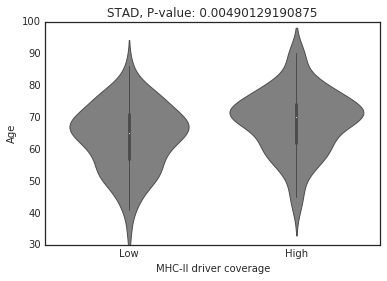

MHC-I LIHC 0.0284093114317 55.5952380952 62.2619047619


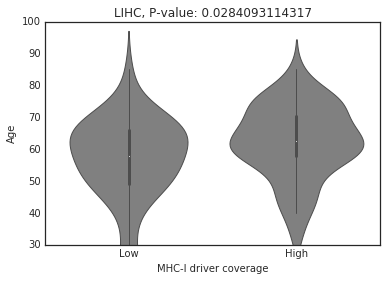

17


In [24]:
# high v low, within tissue
correction = 0
for tissue in df.Tissue.unique():
    if len(df[df.Tissue == tissue].dropna()) > 100:
        correction += 1
        patients_with_tissue = list(df[df.Tissue == tissue].dropna().index)
        tissue_df = df.ix[patients_with_tissue]
        LI_tissue, HI_tissue = tissue_df.classI.quantile(0.25), tissue_df.classI.quantile(0.75)
        LII_tissue, HII_tissue = tissue_df.classII.quantile(0.25), tissue_df.classII.quantile(0.75)
        UI, PI = sp.mannwhitneyu(tissue_df[tissue_df.classI < LI_tissue].Age,
                                   tissue_df[tissue_df.classI > HI_tissue].Age)
        UII, PII = sp.mannwhitneyu(tissue_df[tissue_df.classII < LII_tissue].Age,
                                   tissue_df[tissue_df.classII > HII_tissue].Age)
        if PI*17 < 0.05:
            print 'MHC-I', tissue, PI*17, tissue_df[tissue_df.classI < LI_tissue].Age.mean(), tissue_df[tissue_df.classI > HI_tissue].Age.mean()
            tmp_df = pd.DataFrame({'Age': list(tissue_df[tissue_df.classI < LI_tissue].Age) + list(tissue_df[tissue_df.classI > HI_tissue].Age),
                                   'Driver coverage': ['Low' for x in tissue_df[tissue_df.classI < LI_tissue].Age] + ['High' for x in tissue_df[tissue_df.classI > HI_tissue].Age]})
            sns.violinplot(x='Driver coverage', y='Age', data=tmp_df, color='grey')
            plt.title(tissue + ', P-value: ' +  str(PI*17))
            plt.xlabel('MHC-I driver coverage')
            plt.ylim(30, 100)
            plt.show()
            plt.clf()
        if PII*17 < 0.05:
            print 'MHC-II', tissue, PII*17, tissue_df[tissue_df.classII < LII_tissue].Age.mean(), tissue_df[tissue_df.classII > HII_tissue].Age.mean()
            tmp_df = pd.DataFrame({'Age': list(tissue_df[tissue_df.classII < LII_tissue].Age) + list(tissue_df[tissue_df.classII > HII_tissue].Age),
                                   'Driver coverage': ['Low' for x in tissue_df[tissue_df.classII < LII_tissue].Age] + ['High' for x in tissue_df[tissue_df.classII > HII_tissue].Age]})
            sns.violinplot(x='Driver coverage', y='Age', data=tmp_df, color='grey')
            plt.title(tissue + ', P-value: ' +  str(PII*17))
            plt.xlabel('MHC-II driver coverage')
            plt.ylim(30, 100)
            plt.show()
            plt.clf()
print correction

MHC-II STAD 0.00574471583312 64.1029411765 70.0163934426


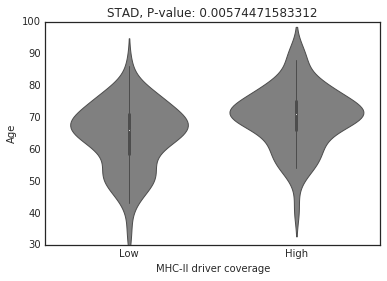

MHC-I LIHC 0.0344084975045 55.9518072289 62.6949152542


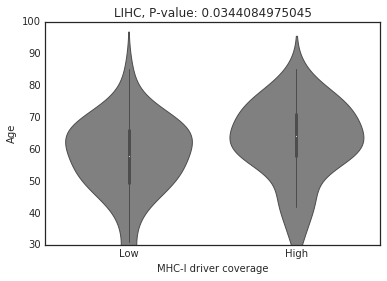

17


In [25]:
# high v low, across all
correction = 0
for tissue in df.Tissue.unique():
    if len(df[df.Tissue == tissue].dropna()) > 100:
        correction += 1
        patients_with_tissue = list(df[df.Tissue == tissue].dropna().index)
        tissue_df = df.ix[patients_with_tissue]
        UI, PI = sp.mannwhitneyu(tissue_df[tissue_df.classI < LI].Age,
                                   tissue_df[tissue_df.classI > HI].Age)
        UII, PII = sp.mannwhitneyu(tissue_df[tissue_df.classII < LII].Age,
                                   tissue_df[tissue_df.classII > HII].Age)
        if PI*17 < 0.05:
            print 'MHC-I', tissue, PI*17, tissue_df[tissue_df.classI < LI].Age.mean(), tissue_df[tissue_df.classI > HI].Age.mean()
            tmp_df = pd.DataFrame({'Age': list(tissue_df[tissue_df.classI < LI].Age) + list(tissue_df[tissue_df.classI > HI].Age),
                                   'Driver coverage': ['Low' for x in tissue_df[tissue_df.classI < LI].Age] + ['High' for x in tissue_df[tissue_df.classI > HI].Age]})
            sns.violinplot(x='Driver coverage', y='Age', data=tmp_df, color='grey')
            plt.title(tissue + ', P-value: ' +  str(PI*17))
            plt.xlabel('MHC-I driver coverage')
            plt.ylim(30, 100)
            plt.show()
            plt.clf()
        if PII*17 < 0.05:
            print 'MHC-II', tissue, PII*17, tissue_df[tissue_df.classII < LII].Age.mean(), tissue_df[tissue_df.classII > HII].Age.mean()
            tmp_df = pd.DataFrame({'Age': list(tissue_df[tissue_df.classII < LII].Age) + list(tissue_df[tissue_df.classII > HII].Age),
                                   'Driver coverage': ['Low' for x in tissue_df[tissue_df.classII < LII].Age] + ['High' for x in tissue_df[tissue_df.classII > HII].Age]})
            sns.violinplot(x='Driver coverage', y='Age', data=tmp_df, color='grey')
            plt.title(tissue + ', P-value: ' +  str(PII*17))
            plt.xlabel('MHC-II driver coverage')
            plt.ylim(30, 100)
            plt.show()
            plt.clf()
print correction

Driver count

In [ ]:
# high v low
correction = 0
for tissue in df.Tissue.unique():
    if len(df[df.Tissue == tissue].dropna()) > 100:
        correction += 1
        patients_with_tissue = list(df[df.Tissue == tissue].dropna().index)
        tissue_df = df.ix[patients_with_tissue]
        UI, PI = sp.mannwhitneyu(tissue_df[tissue_df.classI < LI].Driver_sum,
                                   tissue_df[tissue_df.classI > HI].Driver_sum)
        UII, PII = sp.mannwhitneyu(tissue_df[tissue_df.classII < LII].Driver_sum,
                                   tissue_df[tissue_df.classII > HII].Driver_sum)
        if PI*17 < 0.05:
            print 'MHC-I', tissue, PI, tissue_df[tissue_df.classI < LI].Driver_sum.mean(), tissue_df[tissue_df.classI > HI].Driver_sum.mean()
            tmp_df = pd.DataFrame({'Mutation_count': list(tissue_df[tissue_df.classI < LI].Driver_sum) + list(tissue_df[tissue_df.classI > HI].Driver_sum),
                                   'Driver coverage': ['High' for x in tissue_df[tissue_df.classI > HI].Age] + ['Low' for x in tissue_df[tissue_df.classI < LI].Age]})
            sns.boxplot(x='Driver coverage', y='Mutation_count', data=tmp_df, color='grey')
            plt.title(tissue + ', P-value: ' +  str(PI))
            plt.xlabel('MHC-I driver coverage')
            plt.show()
            plt.clf()
        if PII*17 < 0.05:
            print 'MHC-II', tissue, PII, tissue_df[tissue_df.classII < LII].Driver_sum.mean(), tissue_df[tissue_df.classII > HII].Driver_sum.mean()
            tmp_df = pd.DataFrame({'Mutation_count': list(tissue_df[tissue_df.classII < LII].Driver_sum) + list(tissue_df[tissue_df.classII > HII].Driver_sum),
                                   'Driver coverage': ['High' for x in tissue_df[tissue_df.classII > HII].Age] + ['Low' for x in tissue_df[tissue_df.classII < LII].Age]})
            sns.boxplot(x='Driver coverage', y='Mutation_count', data=tmp_df, color='grey')
            plt.title(tissue + ', P-value: ' +  str(PII*17))
            plt.xlabel('MHC-II driver coverage')
            plt.show()
            plt.clf()
print correction

###Robustness to thresholds

In [59]:
coverage_cutoffs = [(0.25, 10), (0.5, 15), (0.75, 20), (1, 25)]
percentiles = zip([round(x, 3) for x in np.arange(.10, .50, .05)], 
                  [round(x, 3) for x in np.arange(.90, .50, -.05)])

LGG 463


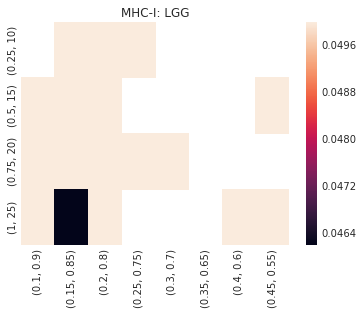

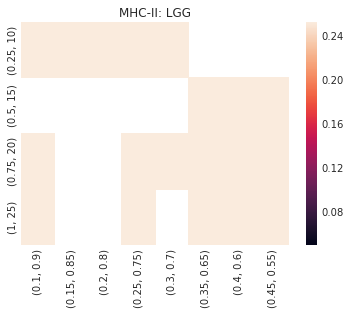

GBM 365


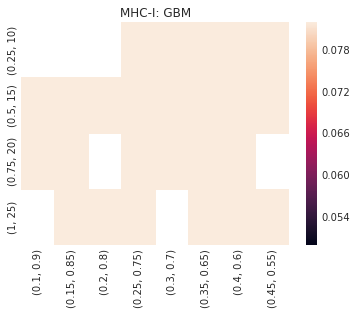

STAD 382


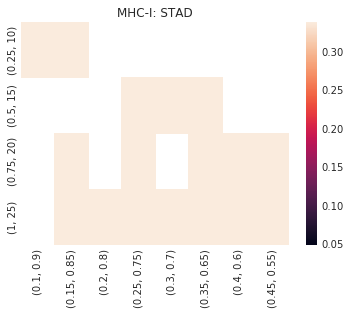

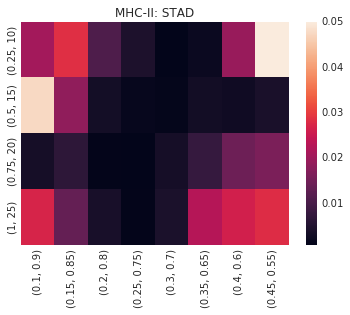

LIHC 336


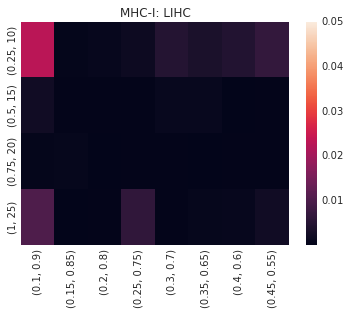

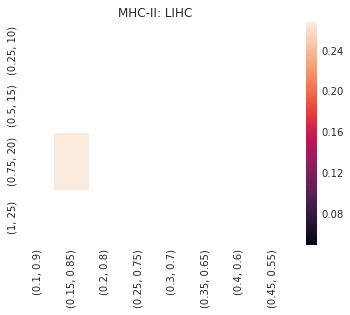

KIRC 269


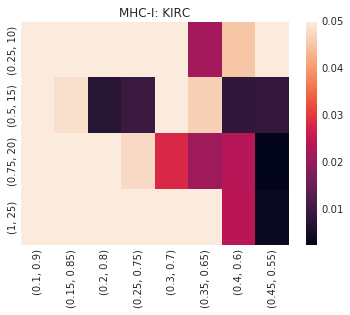

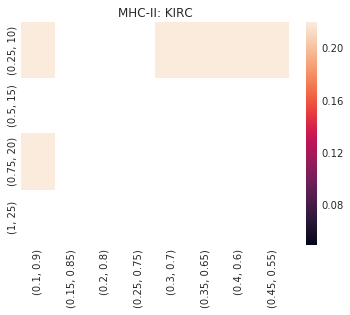

LUAD 463


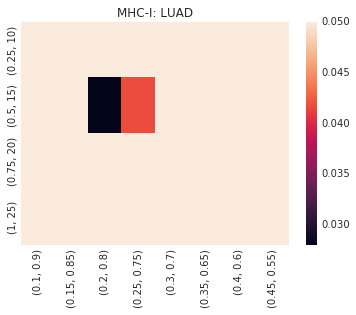

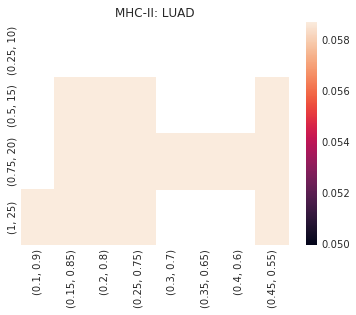

LAML 0
LUSC 386


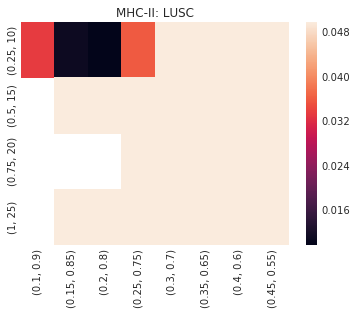

SKCM 421


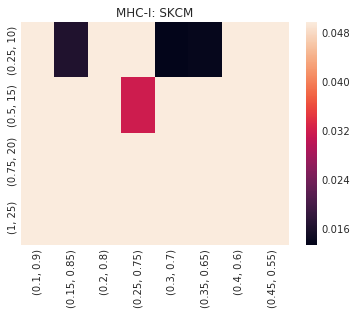

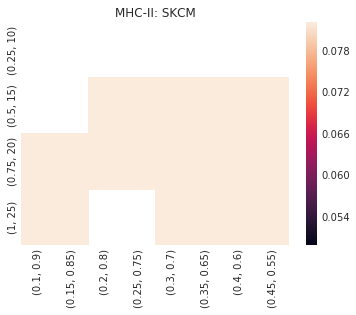

UVM 0
BLCA 380


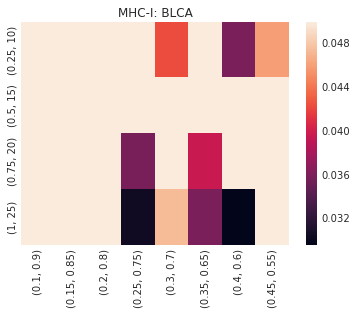

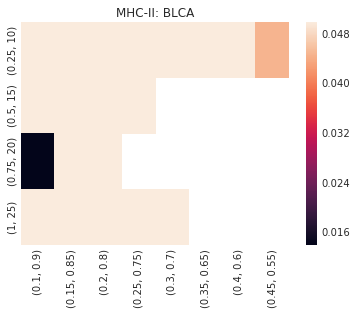

PRAD 456


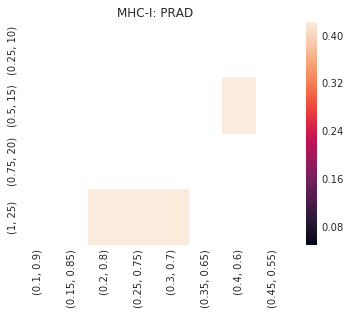

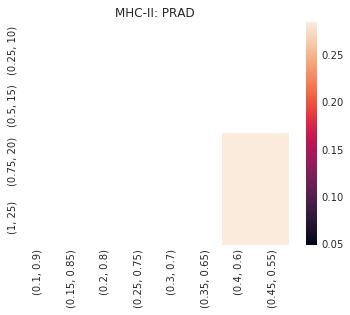

COAD 308


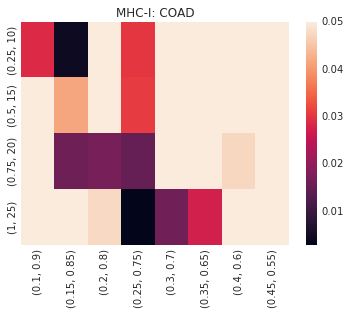

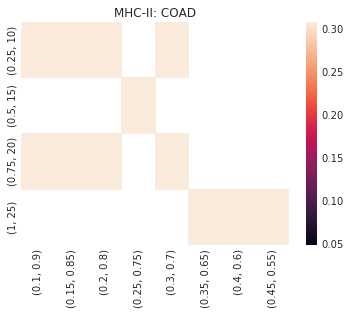

READ 94


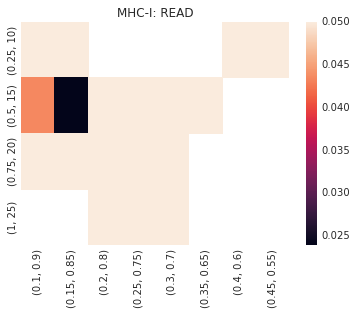

BRCA 239


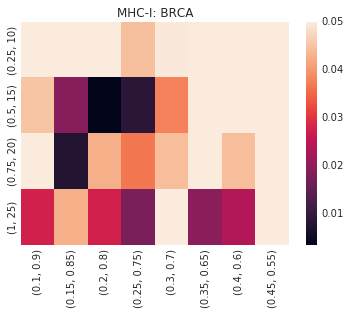

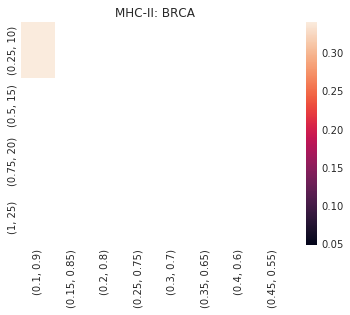

HNSC 473


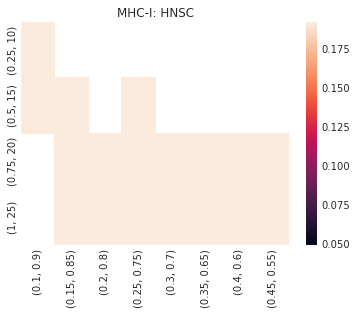

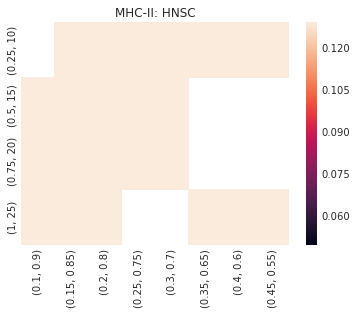

KIRP 247


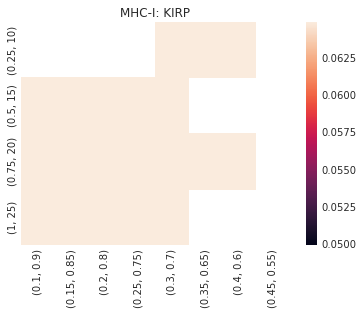

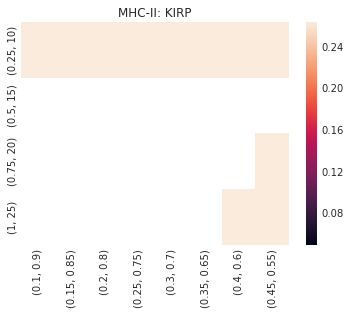

OV 188


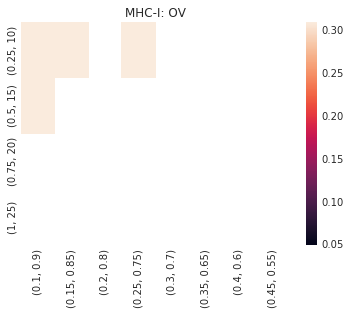

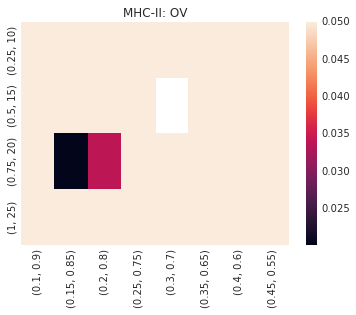

PCPG 0
PAAD 161


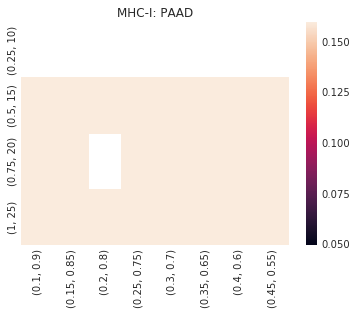

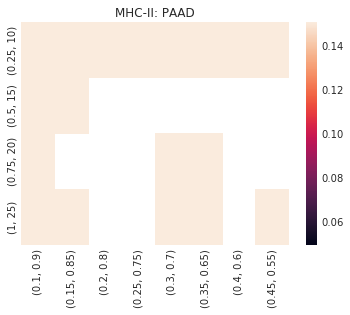

TGCT 0
ACC 0
THCA 451


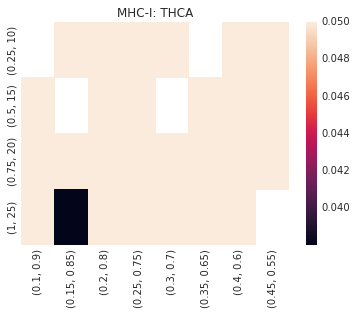

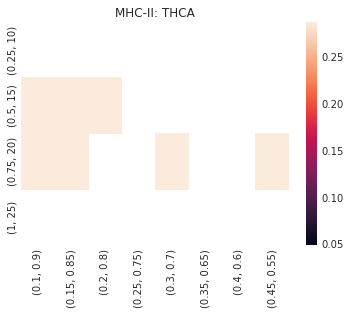

MESO 0
CESC 37
DLBC 34
UCS 0
UCEC 79


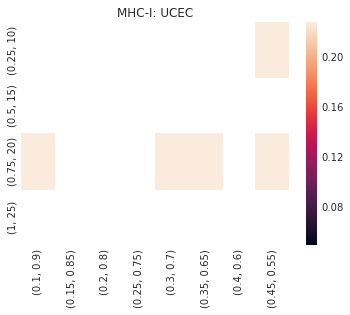

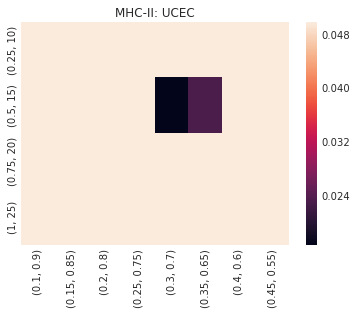

KICH 59


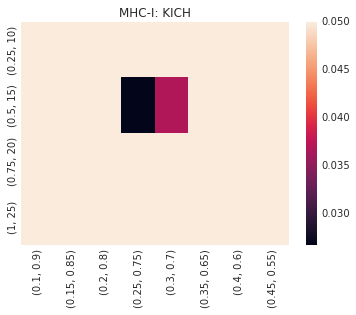

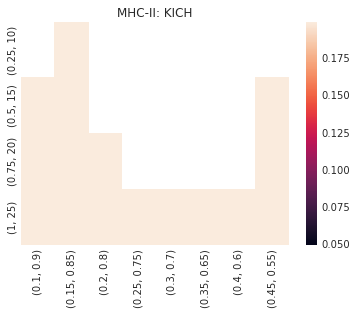

In [80]:
for tissue in df.Tissue.unique():
    patients_with_tissue = list(df[df.Tissue == tissue].dropna().index)
    print tissue, len(patients_with_tissue)
    if len(patients_with_tissue) < 50:
        continue
    
    PI_values, PII_values = [], []

    for cI, cII in coverage_cutoffs:

        df.classI = sum(classI < cI, axis=1) / 1018
        df.classII = sum(classII < cII, axis=1) / 1018
        tissue_df = df.ix[patients_with_tissue]
        PI_array, PII_array = [], []

        for L, H in percentiles:

            LI_tissue, HI_tissue = tissue_df.classI.quantile(L), tissue_df.classI.quantile(H)
            LII_tissue, HII_tissue = tissue_df.classII.quantile(L), tissue_df.classII.quantile(H)

            UI, PI = sp.mannwhitneyu(tissue_df[tissue_df.classI < LI_tissue].Age,
                               tissue_df[tissue_df.classI > HI_tissue].Age)
            UII, PII = sp.mannwhitneyu(tissue_df[tissue_df.classII < LII_tissue].Age,
                                       tissue_df[tissue_df.classII > HII_tissue].Age)
            if np.mean(tissue_df[tissue_df.classI < LI_tissue].Age) < np.mean(tissue_df[tissue_df.classI > HI_tissue].Age):
                PI_array.append(PI)
            else:
                PI_array.append(np.nan)
            if np.mean(tissue_df[tissue_df.classII < LII_tissue].Age) < np.mean(tissue_df[tissue_df.classII > HII_tissue].Age):
                PII_array.append(PII)
            else:
                PII_array.append(np.nan)
        PI_values.append(PI_array)
        PII_values.append(PII_array)
    try:
        sns.heatmap(PI_values, xticklabels=percentiles, yticklabels=coverage_cutoffs,
                   vmax=0.05)
        plt.title('MHC-I: '+ tissue)
        plt.show()
        plt.clf()
    except:
        None
    try:
        sns.heatmap(PII_values, xticklabels=percentiles, yticklabels=coverage_cutoffs,
                   vmax=0.05)
        plt.title('MHC-II: '+ tissue)
        plt.show()
        plt.clf()
    except:
        None

Plot across all tissues

In [16]:
cI, cII = 0.5, 15
df.classI = sum(classI < cI, axis=1) / 1018
df.classII = sum(classII < cII, axis=1) / 1018

In [17]:
L, H = 0.25, 0.75

In [18]:
def assign_categoryI(x):
    if x < df.classI.quantile(L):
        return 'low'
    elif x > df.classI.quantile(H):
        return 'high'
    else:
        return 'other'
def assign_categoryII(x):
    if x < df.classII.quantile(L):
        return 'low'
    elif x > df.classII.quantile(H):
        return 'high'
    else:
        return 'other'

In [19]:
df['classI_cat'] = df.classI.apply(assign_categoryI)
df['classII_cat'] = df.classII.apply(assign_categoryII)

In [20]:
df.head()

,classI,classII,Tissue,Age,Driver_sum,classI_cat,classII_cat
TCGA-DH-A7UV,0.166994,0.438114,LGG,49.0,2,other,other
TCGA-DH-A7UT,0.211198,0.455796,LGG,30.0,2,high,other
TCGA-DH-A7UU,0.166012,0.403733,LGG,43.0,2,other,low
TCGA-DH-A7UR,0.153242,0.440079,LGG,59.0,0,low,other
TCGA-DH-A7US,0.146365,0.491159,LGG,50.0,2,low,high


In [21]:
df.dropna().Tissue.value_counts()

HNSC    473
LUAD    463
LGG     463
PRAD    456
THCA    451
SKCM    421
LUSC    386
STAD    382
BLCA    380
GBM     365
LIHC    336
COAD    308
KIRC    269
KIRP    247
BRCA    239
OV      188
PAAD    161
READ     94
UCEC     79
KICH     59
CESC     37
DLBC     34
Name: Tissue, dtype: int64

In [22]:
tissue_order = list(df.dropna().Tissue.value_counts()[:20].index)
d, t_used = [], []
f, a = 0, 0
for tissue in tissue_order:
    difference = np.mean(df[(df.Tissue == tissue)&(df.classI_cat == 'low')].Age) - np.mean(df[(df.Tissue == tissue)&(df.classI_cat == 'high')].Age)
    d.append(difference)
    t_used.append(tissue)
    if difference < -2:
        f +=1
    elif difference > 2:
        a += 1
print f, a
tissues_sorted_by_difference = list(pd.DataFrame({'Difference': d, 'Tissue': t_used}).sort_values('Difference').Tissue)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

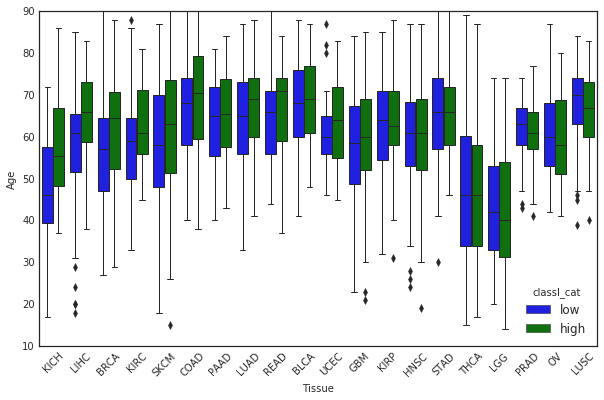

In [139]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tissue', y='Age', hue='classI_cat', data=df, order=tissues_sorted_by_difference,
            hue_order=['low','high'])
plt.xticks(rotation=45)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

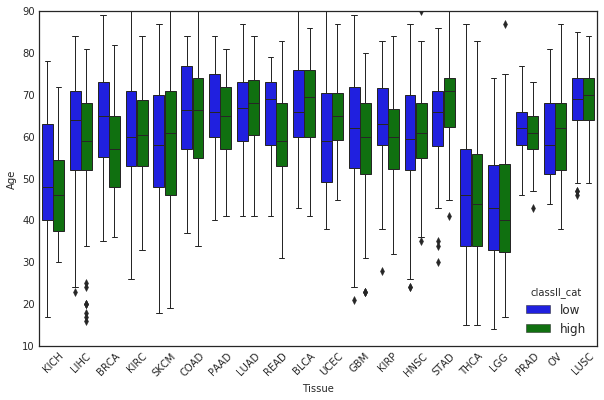

In [143]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tissue', y='Age', hue='classII_cat', data=df, order=tissues_sorted_by_difference,
            hue_order=['low','high'])
plt.xticks(rotation=45)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

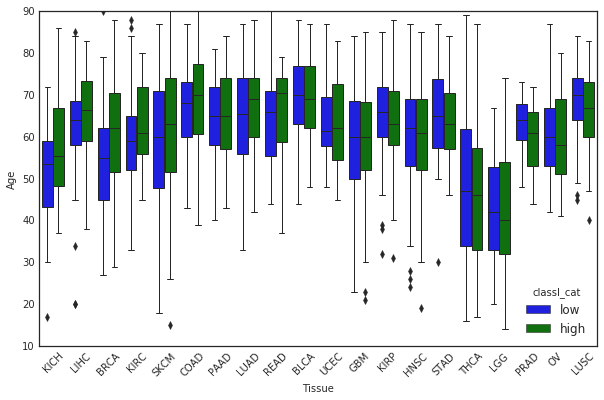

In [25]:
# white patients
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tissue', y='Age', hue='classI_cat', data=df[df.race == 'WHITE'], order=tissues_sorted_by_difference,
            hue_order=['low','high'])
plt.xticks(rotation=45)
